In [2]:
import scipy.io as sio

#Leer datos
Datos0=sio.loadmat('H-C-1.mat') #Healthy
Datos1=sio.loadmat('I-C-1.mat') #Inner
Datos2=sio.loadmat('O-C-1.mat') #Outer
Datos3=sio.loadmat('B-C-1.mat') #Ball
Datos4=sio.loadmat('C-C-1.mat') #Combination
Normal=Datos0['Channel_1'][range(0,2000000,20),0]
Outer=Datos2['Channel_1'][range(0,2000000,20),0]
Inner=Datos1['Channel_1'][range(0,2000000,20),0]
Ball=Datos3['Channel_1'][range(0,2000000,20),0]
Combination=Datos4['Channel_1'][range(0,2000000,20),0]


In [3]:
# Frecuencia de muestreo
Fs=10*1000

In [9]:
import pandas as pd

<AxesSubplot:>

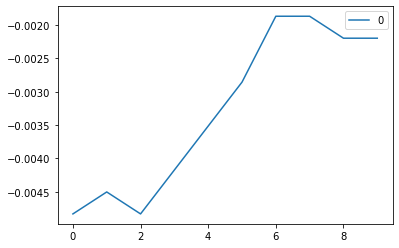

In [58]:
pd.DataFrame(Datos0['Channel_1'])[0:10].plot()

<AxesSubplot:>

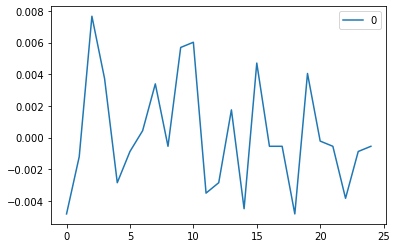

In [59]:
pd.DataFrame(Normal)[0:25].plot()

<AxesSubplot:>

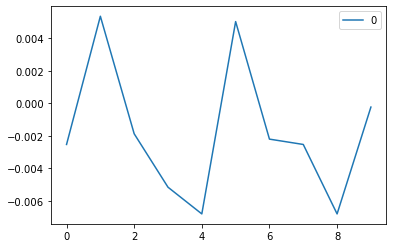

In [47]:
pd.DataFrame(Outer)[0:10].plot()

<AxesSubplot:>

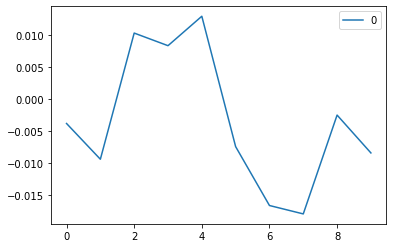

In [48]:
pd.DataFrame(Inner)[0:10].plot()

<AxesSubplot:>

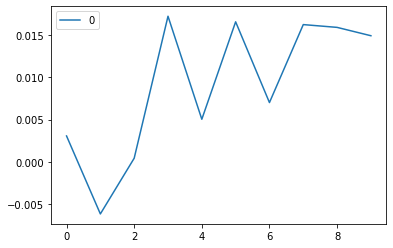

In [49]:
pd.DataFrame(Ball)[0:10].plot()

<AxesSubplot:>

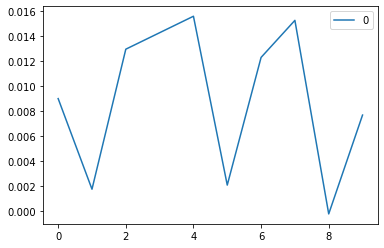

In [50]:
pd.DataFrame(Combination)[0:10].plot()

<AxesSubplot:>

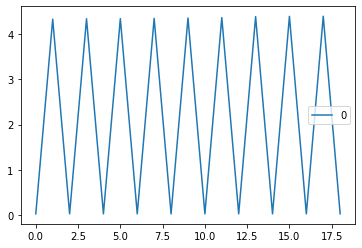

In [51]:
pd.DataFrame(Datos0["Channel_2"][range(0,2000000,20),0])[0:19].plot()

<AxesSubplot:>

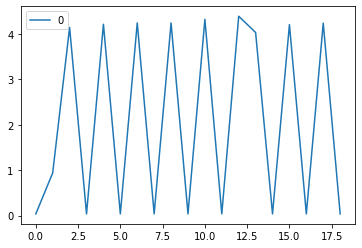

In [52]:
pd.DataFrame(Datos1["Channel_2"][range(0,2000000,20),0])[0:19].plot()

<AxesSubplot:>

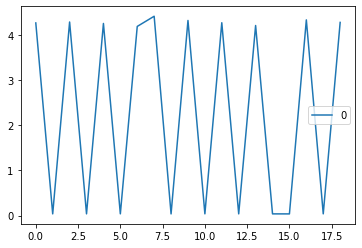

In [53]:
pd.DataFrame(Datos2["Channel_2"][range(0,2000000,20),0])[0:19].plot()

<AxesSubplot:>

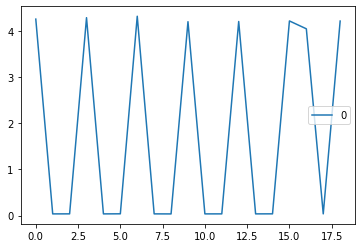

In [54]:
pd.DataFrame(Datos3["Channel_2"][range(0,2000000,20),0])[0:19].plot()

<AxesSubplot:>

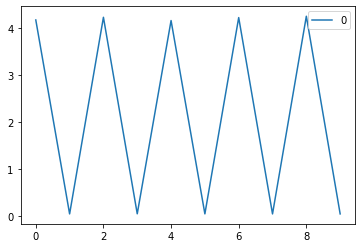

In [55]:
pd.DataFrame(Datos4["Channel_2"][range(0,2000000,20),0])[0:10].plot()

In [28]:
[range(0,2000000,20),0]

[range(0, 2000000, 20), 0]

<AxesSubplot:>

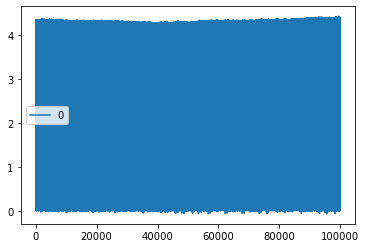

In [45]:
pd.DataFrame(Datos4['Channel_2'][range(0,2000000,20),0]).plot()

<AxesSubplot:>

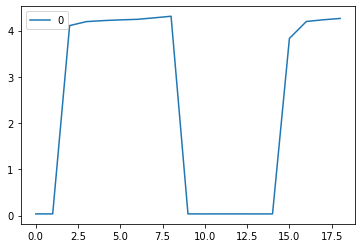

In [41]:
pd.DataFrame(Datos0['Channel_2'])[0:19].plot()